In [134]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from numpy import average
from matplotlib.pyplot import figure
import seaborn as sns
import datetime as dt
from datetime import datetime
from IPython.core.display import HTML

In [2]:
#import data, assign headers
env_data = pd.read_csv(r'C:\Users\Killian\Projects\Final Project\environmental data.csv', sep=',',header=0, engine='python')
man_data = pd.read_excel(r'C:\Users\Killian\Projects\Final Project\manual data.xlsx')

In [3]:
#overview of environmental data
env_data.info()
env_data.head(10)

#dew point is calculated from Td = T - ((100 - RH)/5.) where Td is dew point temperature (in degrees Celsius), 
# T is observed temperature (in degrees Celsius), and RH is relative humidity (in percent) so can be removed
#crop is basil.. it's ALL basil.. so that can go. 
#containers are ALL FS2.. so that can go. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328744 entries, 0 to 328743
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   container            328744 non-null  object 
 1   crop                 328744 non-null  object 
 2   rep                  328744 non-null  float64
 3   bay                  328744 non-null  int64  
 4   placement            328744 non-null  object 
 5   date                 328744 non-null  int64  
 6   time                 328744 non-null  object 
 7   temp_c               328744 non-null  float64
 8   relative_humidity_%  328744 non-null  float64
 9   dewpoint             328744 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 25.1+ MB


,container,crop,rep,bay,placement,date,time,temp_c,relative_humidity_%,dewpoint
0,FS2,basil,1.0,207,bottom,20180911,14:10:00,24.6006,58.9300,16.0403
1,FS2,basil,1.0,207,bottom,20180911,14:20:00,25.0082,55.5349,15.4930
2,FS2,basil,1.0,207,bottom,20180911,14:30:00,25.2441,61.0204,17.1932
3,FS2,basil,1.0,207,bottom,20180911,14:40:00,25.5444,60.0820,17.2304
4,FS2,basil,1.0,207,bottom,20180911,14:50:00,25.5551,55.2679,15.9263
5,FS2,basil,1.0,207,bottom,20180911,15:00:00,25.4479,55.3594,15.8525
6,FS2,basil,1.0,207,bottom,20180911,15:10:00,25.2870,55.6493,15.7846
7,FS2,basil,1.0,207,bottom,20180911,15:20:00,25.1798,55.6570,15.6869
8,FS2,basil,1.0,207,bottom,20180911,15:30:00,25.1798,56.2673,15.8575
9,FS2,basil,1.0,207,bottom,20180911,15:40:00,25.2227,57.2362,16.1650


In [4]:
#overview of manual data
man_data.info()
man_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   container                   7380 non-null   object 
 1   crop                        7380 non-null   object 
 2   rep                         7380 non-null   int64  
 3   bay                         7380 non-null   int64  
 4   reservoir_size_liters       7380 non-null   int64  
 5   plant                       7380 non-null   int64  
 6   date                        7380 non-null   int64  
 7   pH                          7020 non-null   float64
 8   EC                          7380 non-null   float64
 9   h2o_temp_C                  7020 non-null   float64
 10  d.o.                        1440 non-null   float64
 11  plant_height_cm             1606 non-null   float64
 12  harvest_fresh_mass_g        147 non-null    float64
 13  harvest_dry_mass_g          147 n

,container,crop,rep,bay,reservoir_size_liters,plant,date,pH,EC,h2o_temp_C,...,tissue_Mg_%,tissue_S_ppm,tissue_Fe_ppm,tissue_Mn_ppm,tissue_B_ppm,tissue_Cu_ppm,tissue_Zn_ppm,tissue_Mo_ppm,tissue_Na_ppm,tissue_Al_ppm
0,FS2,basil,1,201,75,101,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FS2,basil,1,201,75,102,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FS2,basil,1,201,75,103,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FS2,basil,1,201,75,104,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FS2,basil,1,201,75,105,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,FS2,basil,1,201,75,106,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,FS2,basil,1,201,75,107,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FS2,basil,1,201,75,108,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,FS2,basil,1,201,75,109,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,FS2,basil,1,201,75,110,20180810,6.3,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Convert time and date into timestamp objects 

env_data['date'] = pd.to_datetime(env_data['date'], format='%Y%m%d')
env_data['time'] = pd.to_datetime(env_data['time'], format='%H:%M:%S').dt.time

man_data['date'] = pd.to_datetime(man_data['date'], format='%Y%m%d')

In [6]:
env_data
#man_data

,container,crop,rep,bay,placement,date,time,temp_c,relative_humidity_%,dewpoint
0,FS2,basil,1.0,207,bottom,2018-09-11,14:10:00,24.6006,58.9300,16.0403
1,FS2,basil,1.0,207,bottom,2018-09-11,14:20:00,25.0082,55.5349,15.4930
2,FS2,basil,1.0,207,bottom,2018-09-11,14:30:00,25.2441,61.0204,17.1932
3,FS2,basil,1.0,207,bottom,2018-09-11,14:40:00,25.5444,60.0820,17.2304
4,FS2,basil,1.0,207,bottom,2018-09-11,14:50:00,25.5551,55.2679,15.9263
...,...,...,...,...,...,...,...,...,...,...
328739,FS2,basil,2.5,208,bottom,2018-12-18,10:30:00,26.4955,55.0390,16.7349
328740,FS2,basil,2.5,208,bottom,2018-12-18,10:40:00,26.5276,60.0133,18.1354
328741,FS2,basil,2.5,208,bottom,2018-12-18,10:50:00,26.6671,65.0869,19.5664
328742,FS2,basil,2.5,208,bottom,2018-12-18,11:00:00,26.8923,65.3844,19.8535


In [7]:
#Combine time and date into one column
env_data['date'] = env_data.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)

<ipython-input-7-e8e2aa2dc773>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  env_data['date'] = env_data.apply(lambda r : pd.datetime.combine(r['date'],r['time']),1)


In [8]:
# remove index, container, crop, time, dewpoint

env_data = env_data.drop(['container', 'crop', 'time', 'dewpoint'], axis=1)


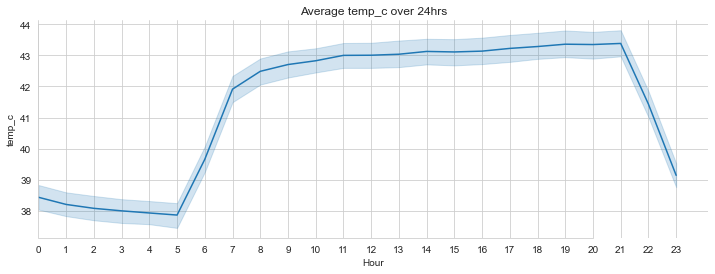

In [9]:
#Checking values to see if suitable to integrate with other dataset. 

#daily_avg = env_data.groupby(env_data["date"].dt.hour)["temp_c"].mean()
Hour = env_data["date"].dt.hour

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y= env_data["temp_c"], data=env_data)

plt.title('Average temp_c over 24hrs')
plt.ylabel('temp_c')
plt.xlabel('Hour')
plt.xlim(0)
sns.despine(trim=True)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

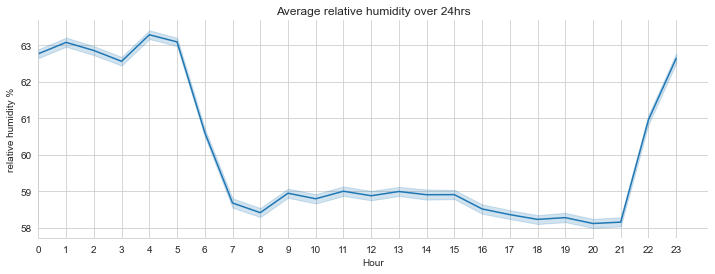

In [10]:
#Checking values to see if suitable to integrate with other dataset. 

#daily_avg = env_data.groupby(env_data["date"].dt.hour)["relative_humidity_%"].mean()
Hour = env_data["date"].dt.hour

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.lineplot(x=Hour, y= env_data["relative_humidity_%"], data=env_data)

plt.title('Average relative humidity over 24hrs')
plt.ylabel('relative humidity %')
plt.xlabel('Hour')
plt.xlim(0)
sns.despine(trim=True)
plt.xticks(np.arange(min(Hour), max(Hour) + 1, 1.0))
plt.show()

In [11]:
#Ultimately there is so little *daily* variance between temperature and humidity that it does not seem useful to include this data in the analysis.
# The other dataset is a daily reading, which does not allow for nuance in the readings. It may be possible to condense the first dataset into 24 hour long segments for each day,
#then break each day into 24 segments. The question is whether to increase this data also and how to be aware of outliers to avoid incorrect calculations.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


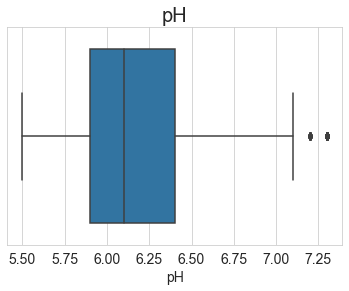

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


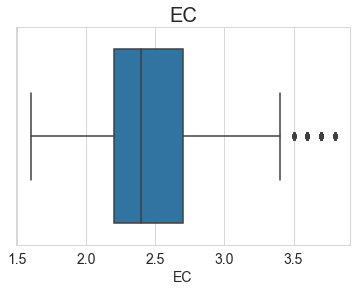

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


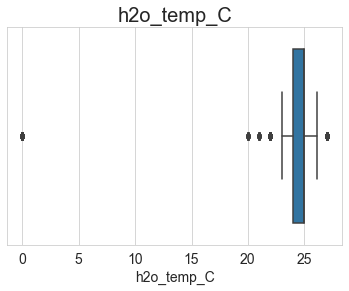

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


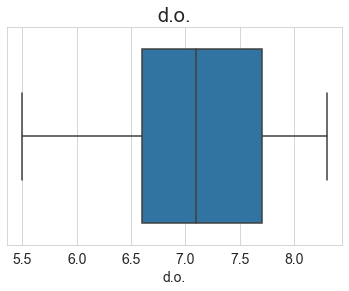

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


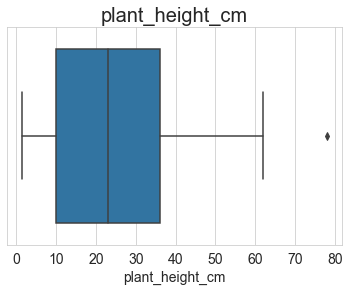

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


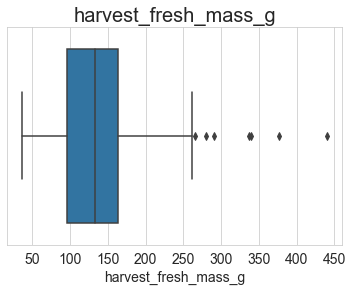

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


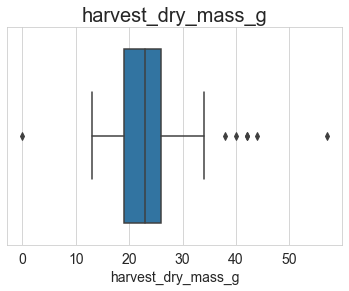

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


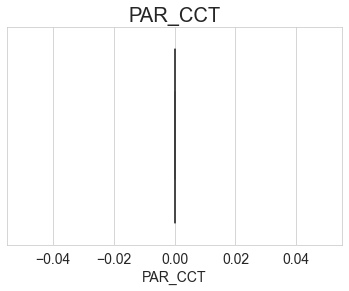

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


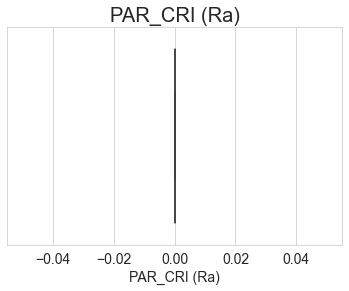

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


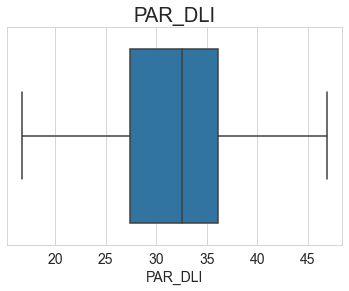

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0, flags=flags)


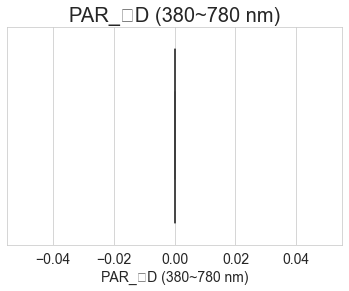

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0, flags=flags)


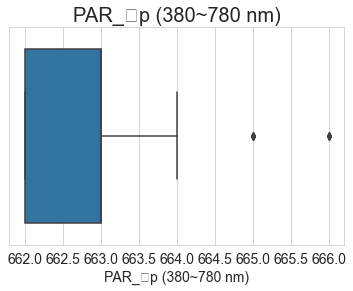

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


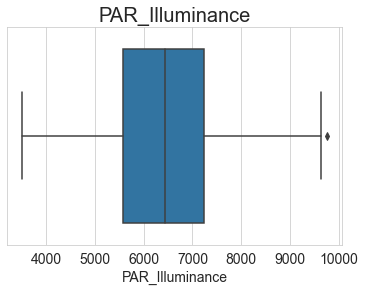

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


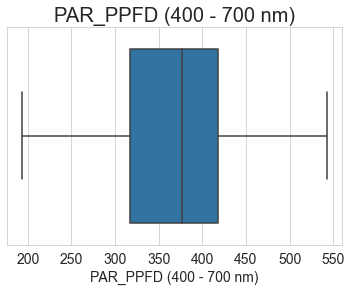

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


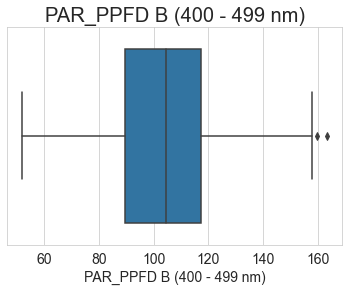

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


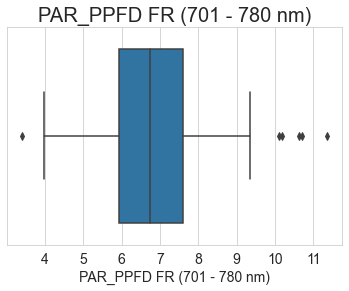

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


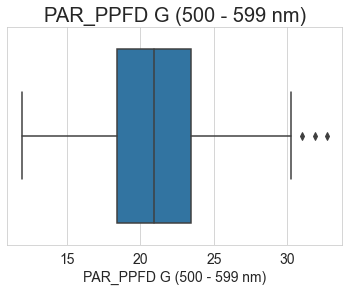

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


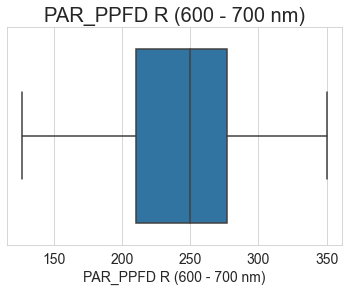

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


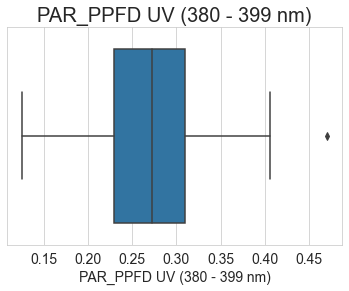

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


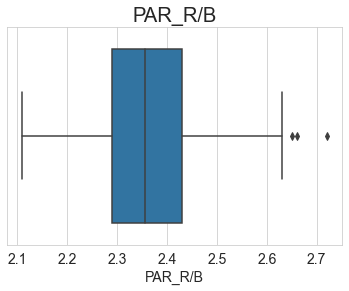

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


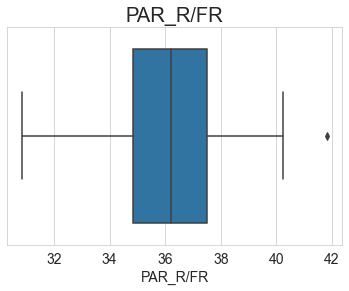

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


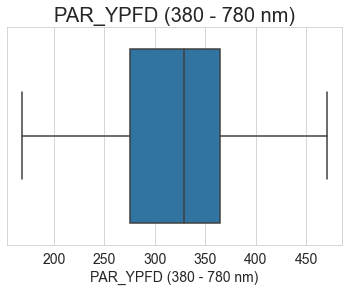

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


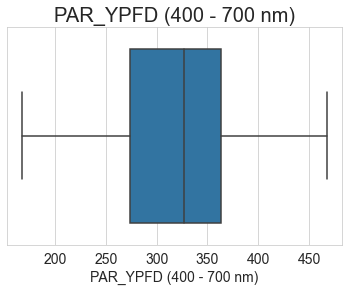

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


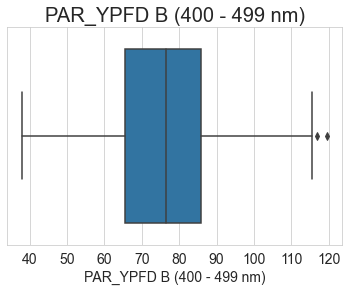

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


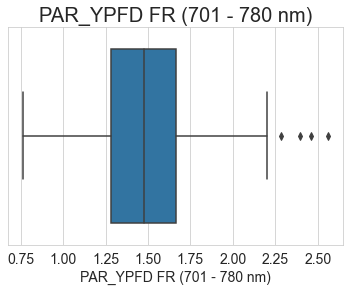

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


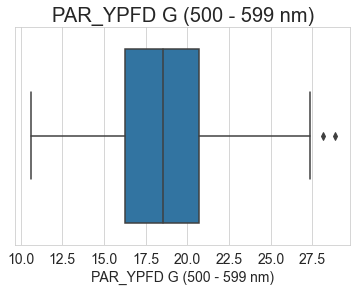

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


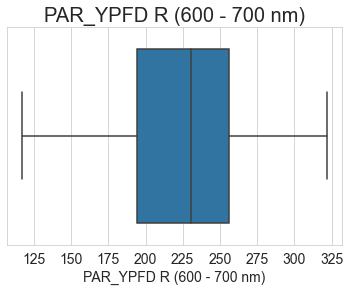

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


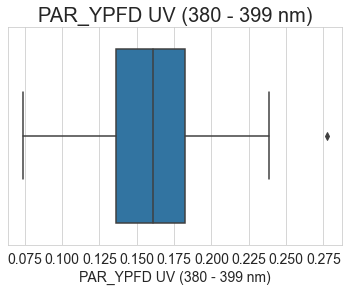

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


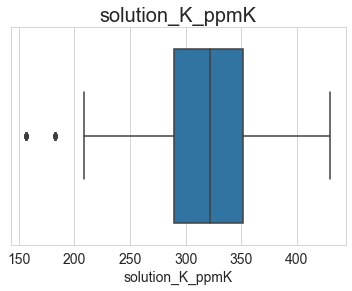

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


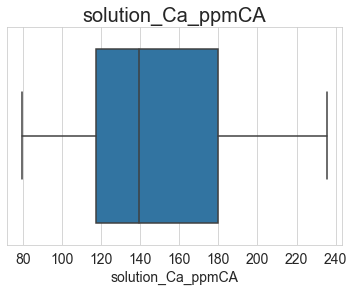

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


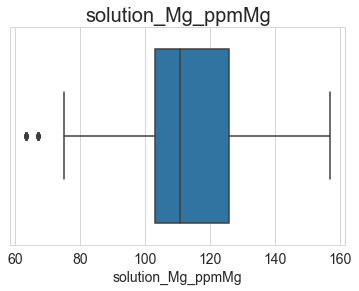

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


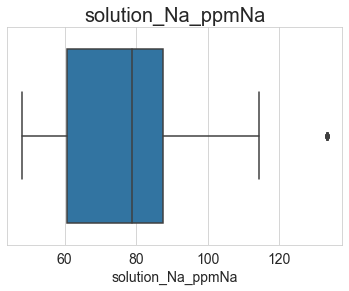

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


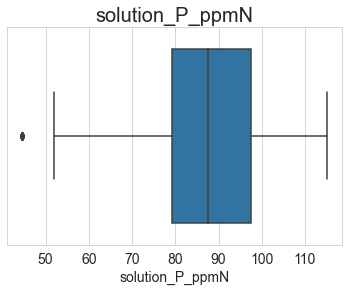

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


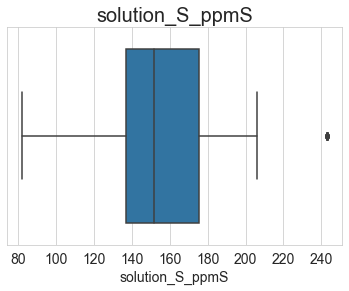

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


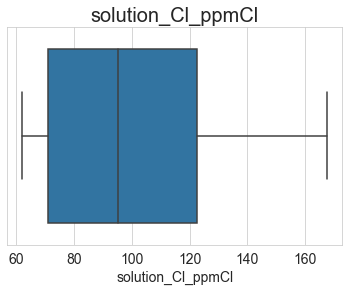

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


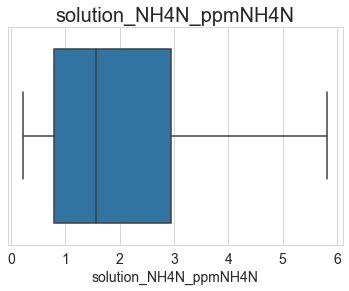

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


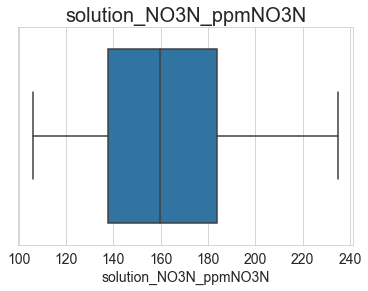

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


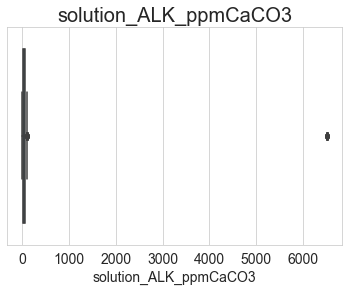

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


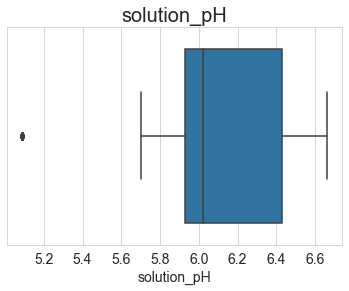

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


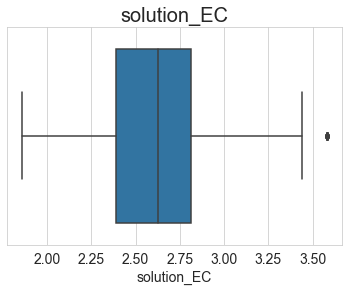

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


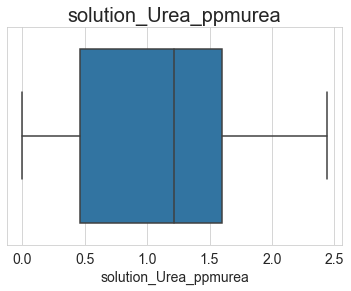

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


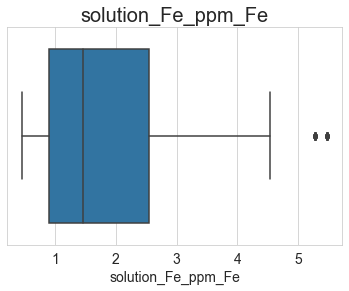

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


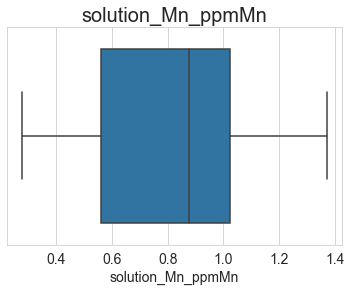

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


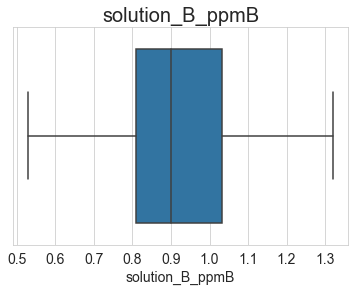

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


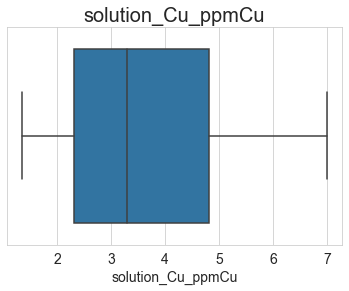

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


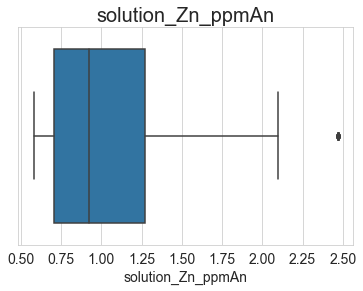

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


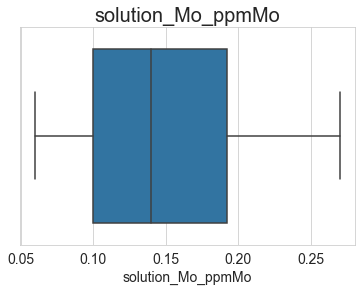

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


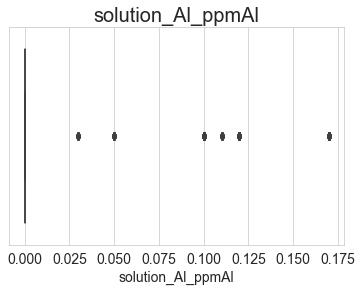

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


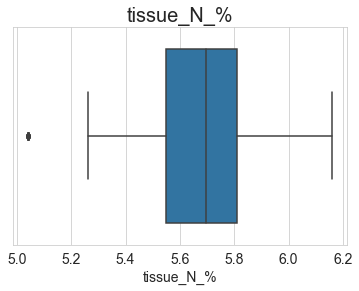

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


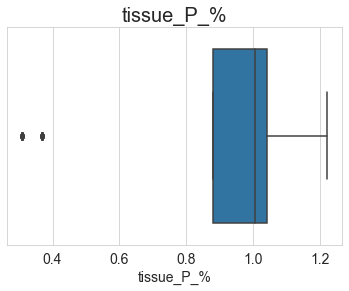

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


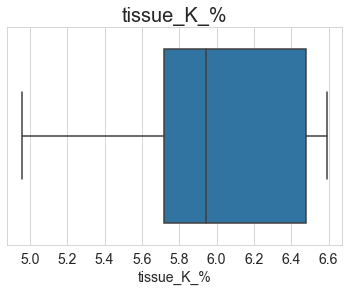

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


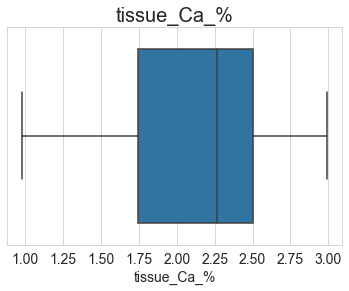

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


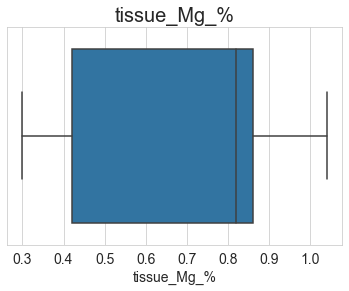

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


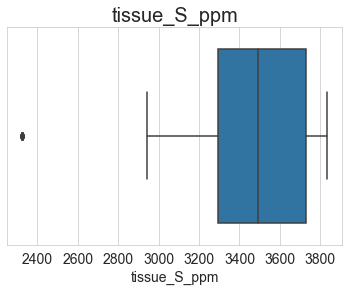

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


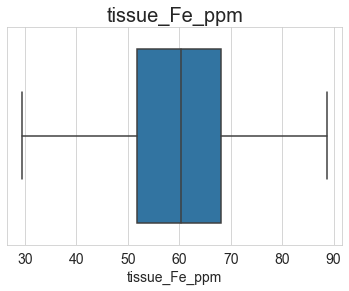

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


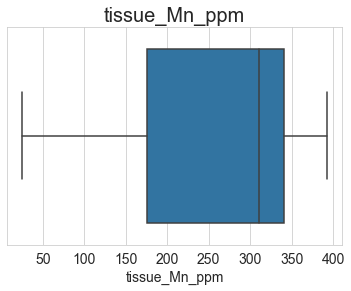

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


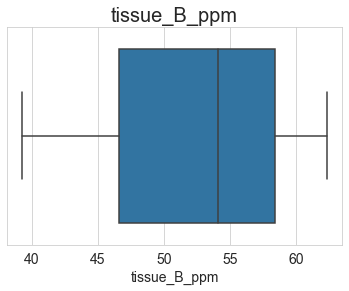

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


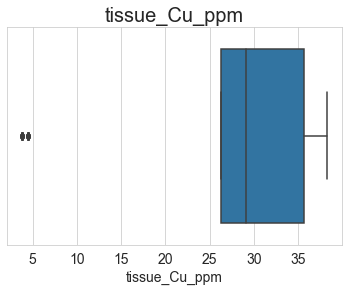

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


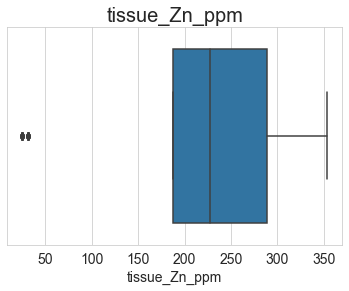

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


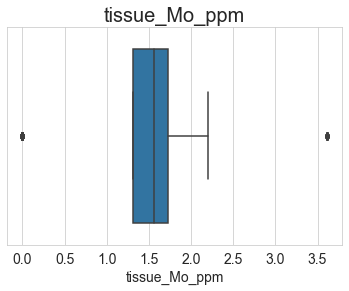

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


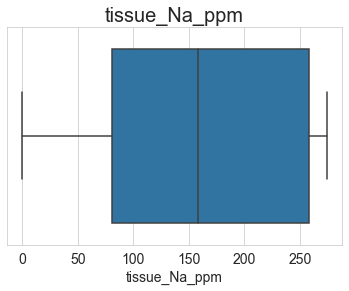

In [12]:
#Step 1: Look for outliers in data. These, in this instance, could indicate a false reading. 
# This is especially important for mineral content, as there are so few readings that outliers could have a dramatic effect.
for column in man_data.columns[7 : -1]:
# box plot of the variable
        ax = sns.boxplot(man_data[column])

# xtick, label, and title
        plt.xticks(fontsize=14)
        plt.xlabel(column, fontsize=14)
        plt.title(column, fontsize=20)
        plt.show()

In [13]:
#plt.figure(figsize=(16,5), dpi=128)

#man_data.hist(bins=15, grid=True)

#plt.suptitle('Univariate Plots')

In [14]:
#Tissue sample results seem quite inconsistent with many outliers. Unclear what, if any advantage to record these. 
# Recommend leaving out entirely and maybe including in later tests for comparison.

#

#check when H2O reading was 0C. Likely to be an error but worth checking.
#All on same day - could be worth avoiding this data as it seems mistaken. Late august freezing temps indoors also unlikely especially as previous and next day at 25C. 
# Recommend replace with similar data.

man_data.loc[man_data['h2o_temp_C'] == 0]

,container,crop,rep,bay,reservoir_size_liters,plant,date,pH,EC,h2o_temp_C,...,tissue_Mg_%,tissue_S_ppm,tissue_Fe_ppm,tissue_Mn_ppm,tissue_B_ppm,tissue_Cu_ppm,tissue_Zn_ppm,tissue_Mo_ppm,tissue_Na_ppm,tissue_Al_ppm
2340,FS2,basil,1,201,75,101,2018-08-30,6.1,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2341,FS2,basil,1,201,75,102,2018-08-30,6.1,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2342,FS2,basil,1,201,75,103,2018-08-30,6.1,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,FS2,basil,1,201,75,104,2018-08-30,6.1,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,FS2,basil,1,201,75,105,2018-08-30,6.1,2.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,FS2,basil,1,210,150,1014,2018-08-30,6.5,2.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,FS2,basil,1,210,150,1015,2018-08-30,6.5,2.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2517,FS2,basil,1,210,150,1016,2018-08-30,6.5,2.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2518,FS2,basil,1,210,150,1017,2018-08-30,6.5,2.4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#As we can see here, temperature values are definitely over 0C in this period.

man_data.loc[man_data['date'] == "2018-08-29"]
man_data.loc[man_data['date'] == "2018-08-31"]

,container,crop,rep,bay,reservoir_size_liters,plant,date,pH,EC,h2o_temp_C,...,tissue_Mg_%,tissue_S_ppm,tissue_Fe_ppm,tissue_Mn_ppm,tissue_B_ppm,tissue_Cu_ppm,tissue_Zn_ppm,tissue_Mo_ppm,tissue_Na_ppm,tissue_Al_ppm
2520,FS2,basil,1,201,75,101,2018-08-31,5.7,2.6,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2521,FS2,basil,1,201,75,102,2018-08-31,5.7,2.6,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2522,FS2,basil,1,201,75,103,2018-08-31,5.7,2.6,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2523,FS2,basil,1,201,75,104,2018-08-31,5.7,2.6,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,FS2,basil,1,201,75,105,2018-08-31,5.7,2.6,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,FS2,basil,1,210,150,1014,2018-08-31,6.3,2.5,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2696,FS2,basil,1,210,150,1015,2018-08-31,6.3,2.5,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2697,FS2,basil,1,210,150,1016,2018-08-31,6.3,2.5,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,FS2,basil,1,210,150,1017,2018-08-31,6.3,2.5,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
man_data['h2o_temp_C']=man_data['h2o_temp_C'].replace(0,man_data['h2o_temp_C'].mean())

In [17]:
man_data.loc[man_data['date'] == "2018-08-30"]

,container,crop,rep,bay,reservoir_size_liters,plant,date,pH,EC,h2o_temp_C,...,tissue_Mg_%,tissue_S_ppm,tissue_Fe_ppm,tissue_Mn_ppm,tissue_B_ppm,tissue_Cu_ppm,tissue_Zn_ppm,tissue_Mo_ppm,tissue_Na_ppm,tissue_Al_ppm
2340,FS2,basil,1,201,75,101,2018-08-30,6.1,2.5,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2341,FS2,basil,1,201,75,102,2018-08-30,6.1,2.5,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2342,FS2,basil,1,201,75,103,2018-08-30,6.1,2.5,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,FS2,basil,1,201,75,104,2018-08-30,6.1,2.5,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,FS2,basil,1,201,75,105,2018-08-30,6.1,2.5,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,FS2,basil,1,210,150,1014,2018-08-30,6.5,2.4,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,FS2,basil,1,210,150,1015,2018-08-30,6.5,2.4,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2517,FS2,basil,1,210,150,1016,2018-08-30,6.5,2.4,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2518,FS2,basil,1,210,150,1017,2018-08-30,6.5,2.4,23.945128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


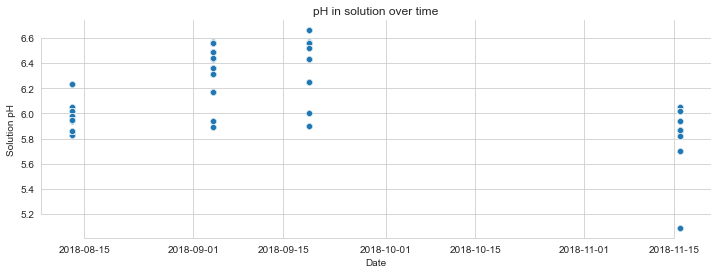

In [18]:
#Checking values to see if pattern to outliers 

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.scatterplot(x=man_data["date"], y= man_data["solution_pH"])

plt.title('pH in solution over time')
plt.ylabel('Solution pH')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

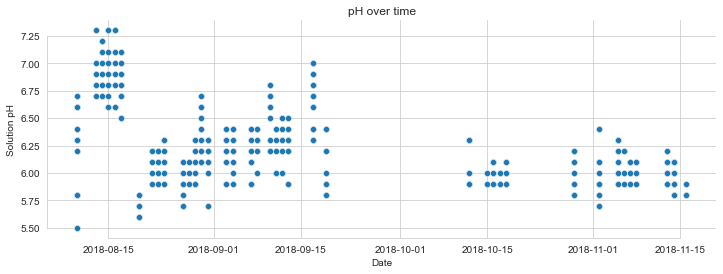

In [19]:
#Checking values to see if pattern to outliers 

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.scatterplot(x=man_data["date"], y= man_data["pH"])

plt.title('pH over time')
plt.ylabel('Solution pH')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

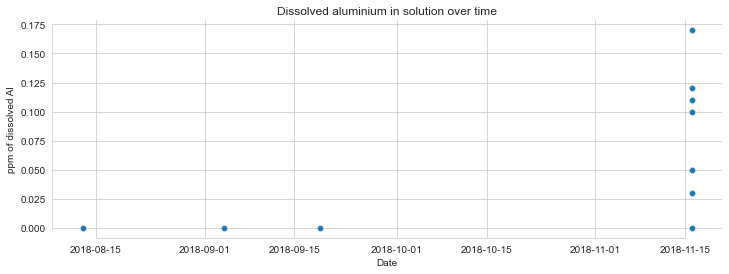

In [20]:
#Checking values to see if pattern to outliers 

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.scatterplot(x=man_data["date"], y= man_data["solution_Al_ppmAl"])

plt.title('Dissolved aluminium in solution over time')
plt.ylabel('ppm of dissolved Al')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

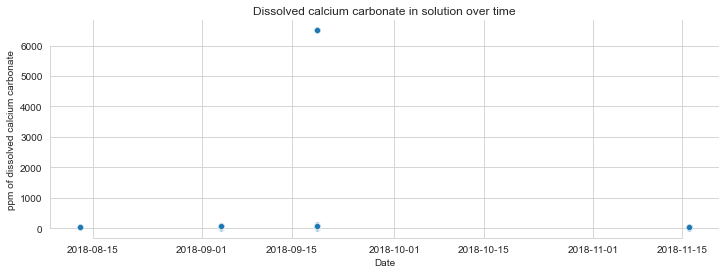

In [21]:
#Checking values to see if pattern to outliers 

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.scatterplot(x=man_data["date"], y= man_data["solution_ALK_ppmCaCO3"])

plt.title('Dissolved calcium carbonate in solution over time')
plt.ylabel('ppm of dissolved calcium carbonate')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

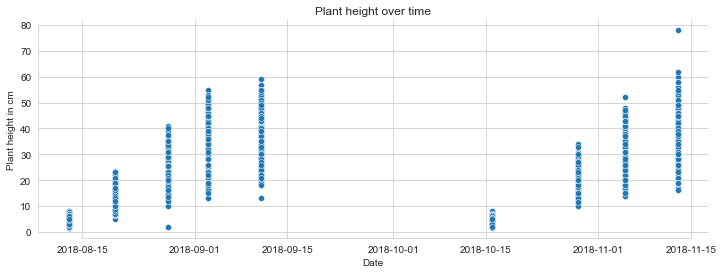

In [22]:
#Checking values to see if pattern to outliers 

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.scatterplot(x=man_data["date"], y= man_data["plant_height_cm"])

plt.title('Plant height over time')
plt.ylabel('Plant height in cm')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

In [23]:
#Much of the data is of limited use due to low sample numbers and erratic readings. 
#pH provides a dense reading of seemingly good quality data. 
#Two crop cycles as seen from growth data. Will combine datasets, then split by date. 

In [24]:
#Drop useless columns; all tissue samples and container & crop.
#man_data.drop(list(man_data.filter(regex = 'tissue')), axis = 1, inplace = True)

In [25]:
#man_data.drop(['container', 'crop'], axis = 1, inplace = True)

In [26]:
man_data.drop(man_data.columns[np.r_[0, 1, 12:69]], axis=1, inplace=True)

In [27]:
man_data

,rep,bay,reservoir_size_liters,plant,date,pH,EC,h2o_temp_C,d.o.,plant_height_cm
0,1,201,75,101,2018-08-10,6.3,2.9,NaN,NaN,NaN
1,1,201,75,102,2018-08-10,6.3,2.9,NaN,NaN,NaN
2,1,201,75,103,2018-08-10,6.3,2.9,NaN,NaN,NaN
3,1,201,75,104,2018-08-10,6.3,2.9,NaN,NaN,NaN
4,1,201,75,105,2018-08-10,6.3,2.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7375,2,210,150,1014,2018-11-16,5.9,3.7,23.0,NaN,NaN
7376,2,210,150,1015,2018-11-16,5.9,3.7,23.0,NaN,NaN
7377,2,210,150,1016,2018-11-16,5.9,3.7,23.0,NaN,NaN
7378,2,210,150,1017,2018-11-16,5.9,3.7,23.0,NaN,NaN


In [28]:
env_data

,rep,bay,placement,date,temp_c,relative_humidity_%
0,1.0,207,bottom,2018-09-11 14:10:00,24.6006,58.9300
1,1.0,207,bottom,2018-09-11 14:20:00,25.0082,55.5349
2,1.0,207,bottom,2018-09-11 14:30:00,25.2441,61.0204
3,1.0,207,bottom,2018-09-11 14:40:00,25.5444,60.0820
4,1.0,207,bottom,2018-09-11 14:50:00,25.5551,55.2679
...,...,...,...,...,...,...
328739,2.5,208,bottom,2018-12-18 10:30:00,26.4955,55.0390
328740,2.5,208,bottom,2018-12-18 10:40:00,26.5276,60.0133
328741,2.5,208,bottom,2018-12-18 10:50:00,26.6671,65.0869
328742,2.5,208,bottom,2018-12-18 11:00:00,26.8923,65.3844


In [29]:
#Make date column the index in preparation for combine this data into 24hr aggregates for each plant. (With min, max and average?)
#upsampling will occur later. 
env_data['date'] = pd.to_datetime(env_data['date'])
env_data = env_data.set_index('date') 

In [30]:
#grouping by bay so that the times can be condensed into 24hr (daily) cycles with mean values
grouper = env_data.groupby(by='bay')
grouper.get_group(207)

,rep,bay,placement,temp_c,relative_humidity_%
date,,,,,
2018-09-11 14:10:00,1.0,207,bottom,24.6006,58.9300
2018-09-11 14:20:00,1.0,207,bottom,25.0082,55.5349
2018-09-11 14:30:00,1.0,207,bottom,25.2441,61.0204
2018-09-11 14:40:00,1.0,207,bottom,25.5444,60.0820
2018-09-11 14:50:00,1.0,207,bottom,25.5551,55.2679
...,...,...,...,...,...
2018-12-18 10:40:00,2.5,207,top,81.6479,56.0613
2018-12-18 10:50:00,2.5,207,top,81.9568,58.8766
2018-12-18 11:00:00,2.5,207,top,81.7058,59.7845


In [31]:
#change groups to 
env_daily = grouper.resample('D').mean()

In [32]:
#change display of floats to 2 decimals. Better than rounding and losing accuracy if doing multiple calculations

pd.options.display.float_format = "{:,.2f}".format

In [33]:
#env_daily
#env_daily.reset_index(drop=True)
env_daily.index = env_daily.index.droplevel(0)

In [34]:
# 13/14/15 Aug are all NaNs. Need to drop.
#display(HTML(env_daily.to_html()))
#list(set(env_daily['bay']))

In [35]:
env_d = env_daily.dropna(axis=0, how='any')

In [36]:
display(env_d.dtypes)

rep                    float64
bay                    float64
temp_c                 float64
relative_humidity_%    float64
dtype: object

In [37]:
env_d['bay'] = env_d['bay'].astype(np.int64)

<ipython-input-37-fabdcb0d0b1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_d['bay'] = env_d['bay'].astype(np.int64)


In [38]:
#need to remove the 2.5 series data as it is not recorded in the manual readings. We will then also change the reps to integers. 
env_d = env_d[env_d.rep != 2.50]
env_d['rep'] = env_d['rep'].astype(np.int64) 

In [68]:
env_d.index.min()

Timestamp('2018-08-23 00:00:00')

In [105]:
env_d.isnull().sum()

date                   0
rep                    0
bay                    0
temp_c                 0
relative_humidity_%    0
dtype: int64

In [106]:
env_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 668 non-null    datetime64[ns]
 1   rep                  668 non-null    int64         
 2   bay                  668 non-null    int64         
 3   temp_c               668 non-null    float64       
 4   relative_humidity_%  668 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 26.2 KB


In [40]:
#display(HTML(env_d.to_html()))

In [41]:
#Make date column the index in preparation for dataframe combination.
#upsampling will occur later. 
man_data = man_data.set_index('date') 

In [51]:
man_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7380 entries, 2018-08-10 to 2018-11-16
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rep                    7380 non-null   int64  
 1   bay                    7380 non-null   int64  
 2   reservoir_size_liters  7380 non-null   int64  
 3   plant                  7380 non-null   int64  
 4   pH                     7020 non-null   float64
 5   EC                     7380 non-null   float64
 6   h2o_temp_C             7020 non-null   float64
 7   d.o.                   1440 non-null   float64
 8   plant_height_cm        1606 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 576.6 KB


In [42]:
#Ensuring proper grouping for c-c-c-combo.
man_daily = man_data.groupby(by='bay')
man_daily.get_group(210)

,rep,bay,reservoir_size_liters,plant,pH,EC,h2o_temp_C,d.o.,plant_height_cm
date,,,,,,,,,
2018-08-10,1,210,150,1001,6.70,2.50,NaN,NaN,NaN
2018-08-10,1,210,150,1002,6.70,2.50,NaN,NaN,NaN
2018-08-10,1,210,150,1003,6.70,2.50,NaN,NaN,NaN
2018-08-10,1,210,150,1004,6.70,2.50,NaN,NaN,NaN
2018-08-10,1,210,150,1005,6.70,2.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-11-16,2,210,150,1014,5.90,3.70,23.00,NaN,NaN
2018-11-16,2,210,150,1015,5.90,3.70,23.00,NaN,NaN
2018-11-16,2,210,150,1016,5.90,3.70,23.00,NaN,NaN


In [87]:
env_d=env_d.reset_index()

In [88]:
man_data=man_data.reset_index()

In [ ]:
#giant_df = pd.merge(env_d, man_data, on='date')
#giant_df

In [101]:
#giant_df.info()

In [122]:
second_att = man_data.merge(env_d, how="left")

In [142]:
second_att

,date,rep,bay,reservoir_size_liters,plant,pH,EC,h2o_temp_C,d.o.,plant_height_cm,temp_c,relative_humidity_%
0,2018-08-10,1,201,75,101,6.30,2.90,NaN,NaN,NaN,NaN,NaN
1,2018-08-10,1,201,75,102,6.30,2.90,NaN,NaN,NaN,NaN,NaN
2,2018-08-10,1,201,75,103,6.30,2.90,NaN,NaN,NaN,NaN,NaN
3,2018-08-10,1,201,75,104,6.30,2.90,NaN,NaN,NaN,NaN,NaN
4,2018-08-10,1,201,75,105,6.30,2.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7375,2018-11-16,2,210,150,1014,5.90,3.70,23.00,NaN,NaN,22.87,59.77
7376,2018-11-16,2,210,150,1015,5.90,3.70,23.00,NaN,NaN,22.87,59.77
7377,2018-11-16,2,210,150,1016,5.90,3.70,23.00,NaN,NaN,22.87,59.77
7378,2018-11-16,2,210,150,1017,5.90,3.70,23.00,NaN,NaN,22.87,59.77


In [143]:
second_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7380 entries, 0 to 7379
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   7380 non-null   datetime64[ns]
 1   rep                    7380 non-null   int64         
 2   bay                    7380 non-null   int64         
 3   reservoir_size_liters  7380 non-null   int64         
 4   plant                  7380 non-null   int64         
 5   pH                     7020 non-null   float64       
 6   EC                     7380 non-null   float64       
 7   h2o_temp_C             7020 non-null   float64       
 8   d.o.                   1440 non-null   float64       
 9   plant_height_cm        1606 non-null   float64       
 10  temp_c                 3978 non-null   float64       
 11  relative_humidity_%    3978 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 749.5

In [125]:
#What to do with missing values? For height - as readings were taken only once a week - we can fit the data to the trend line. 
#for pH, h20, temp_c and rel humidity, we can try substituting for mean values. 
#However, firstly we will split the dataframe.

second_att.isnull().sum()

date                        0
rep                         0
bay                         0
reservoir_size_liters       0
plant                       0
pH                        360
EC                          0
h2o_temp_C                360
d.o.                     5940
plant_height_cm          5774
temp_c                   3402
relative_humidity_%      3402
dtype: int64

In [144]:
first_run = second_att[second_att['rep'] == 1]
second_run = second_att[second_att['rep'] == 2]

In [ ]:
#ax = plt.gca()
#xticks = ax.get_xticks()
#xticks_dates = [datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in xticks]
#ax.set_xticklabels(xticks_dates)

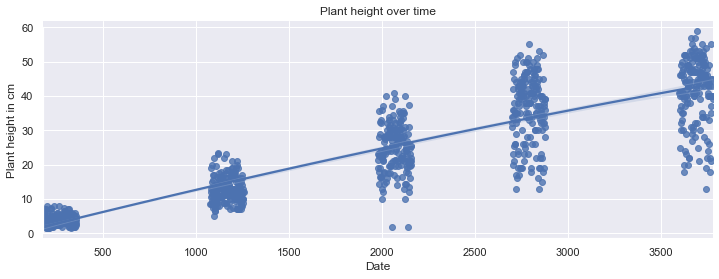

In [152]:
plt.figure(figsize=(12,4))
sns.set_theme(color_codes=True)
sns.regplot(x=first_run.index, y="plant_height_cm", data=first_run, order= 2)

plt.title('Plant height over time')
plt.ylabel('Plant height in cm')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

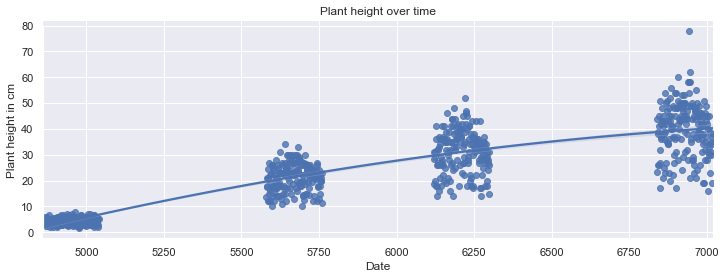

In [153]:
plt.figure(figsize=(12,4))
sns.set_theme(color_codes=True)
sns.regplot(x=second_run.index, y="plant_height_cm", data=second_run, order= 2)

plt.title('Plant height over time')
plt.ylabel('Plant height in cm')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

In [164]:
first_run_fill = first_run.interpolate(method='linear', axis=0).ffill().bfill()

In [166]:
first_run_fill.isnull().sum()

date                     0
rep                      0
bay                      0
reservoir_size_liters    0
plant                    0
pH                       0
EC                       0
h2o_temp_C               0
d.o.                     0
plant_height_cm          0
temp_c                   0
relative_humidity_%      0
dtype: int64

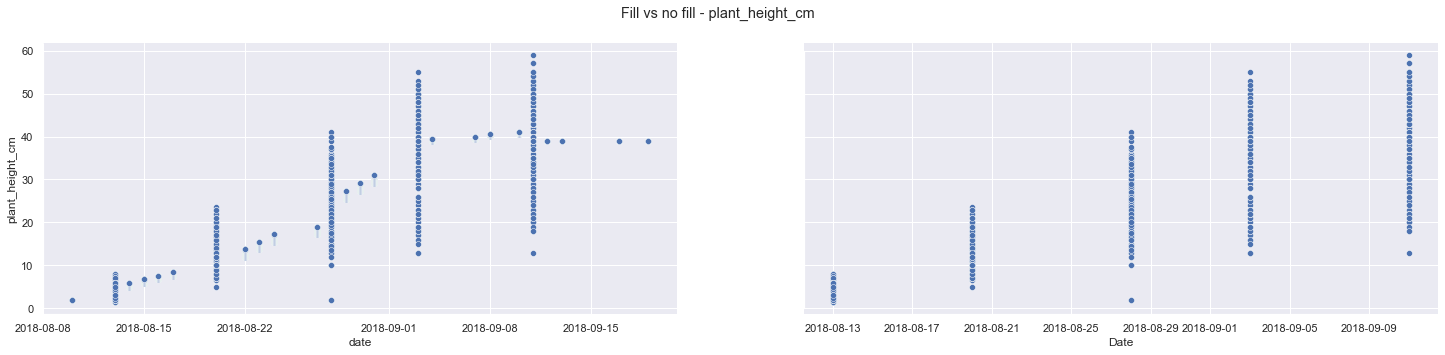

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - plant_height_cm')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='plant_height_cm', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='plant_height_cm', data=first_run)

plt.ylabel('Plant height in cm')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

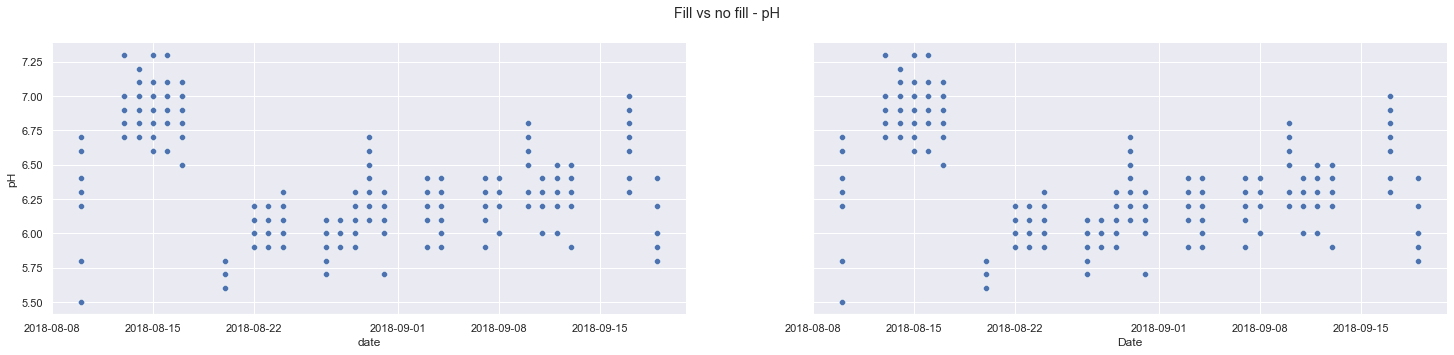

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - pH')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='pH', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='pH', data=first_run)

plt.ylabel('pH')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

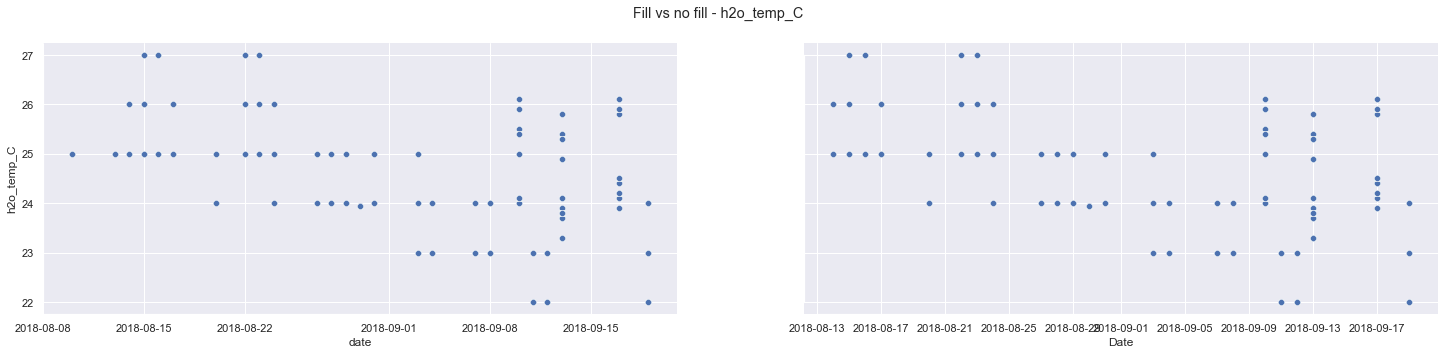

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - h2o_temp_C')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='h2o_temp_C', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='h2o_temp_C', data=first_run)

plt.ylabel('h2o_temp_C')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

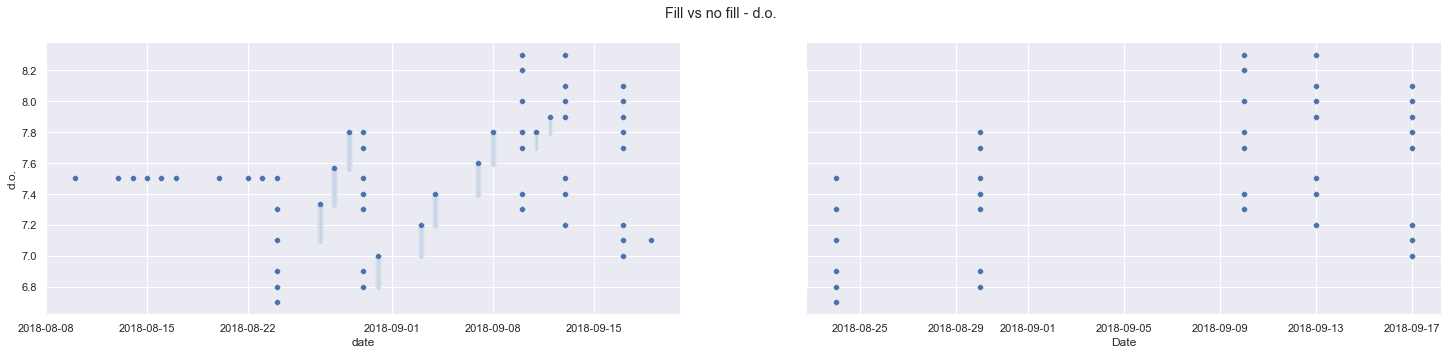

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - d.o.')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='d.o.', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='d.o.', data=first_run)

plt.ylabel('d.o.')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

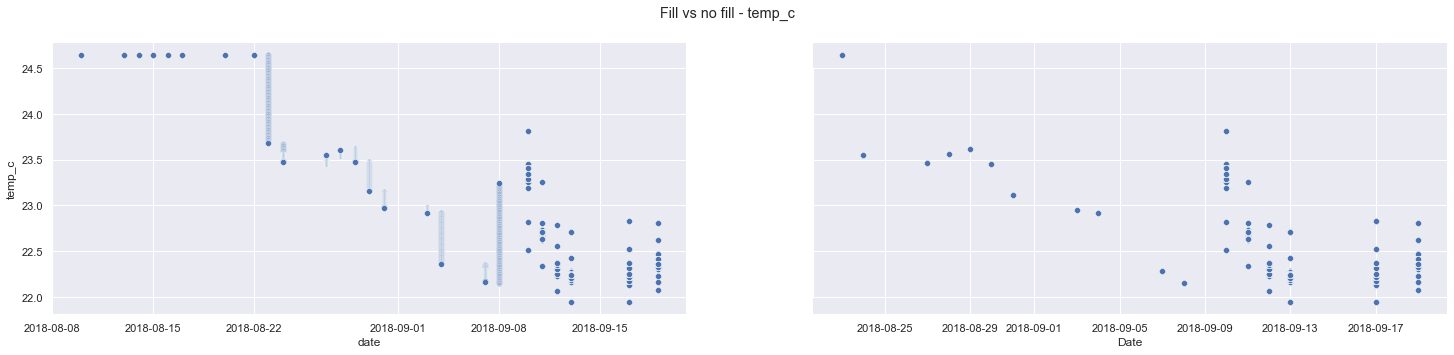

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - temp_c')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='temp_c', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='temp_c', data=first_run)

plt.ylabel('temp_c')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()

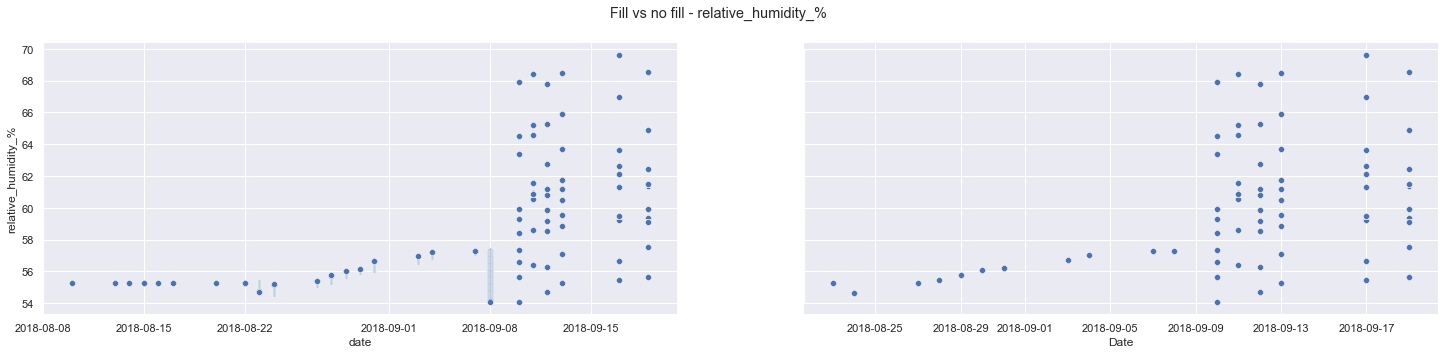

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5), sharey=True)
fig.suptitle('Fill vs no fill - relative_humidity_%')
sns.set_theme(color_codes=True)

# Fill
sns.scatterplot(ax=axes[0], x='date', y='relative_humidity_%', data=first_run_fill)

# No fill
sns.scatterplot(ax=axes[1], x='date', y='relative_humidity_%', data=first_run)

plt.ylabel('relative_humidity_%')
plt.xlabel('Date')
#plt.ylim(0)
sns.despine(trim=True)
plt.show()